# Lab6-Assignment: Topic Classification

## Three models will be trained and evaluated in this notebook for the task of topic classification on the 20 newsgroups text dataset. The models in question are two transformer-based models, BERT(from Lab6.4-Topic-classification-BERT.ipynb) and RoBERTa, and a more conventional machine learning model, Naive Bayes, which utilizes a bag-of-words approach.

### Install/import libraries

Install the simpletransformers library (restart your runtime after the installation)

In [ ]:
#!pip install simpletransformers==0.65.1

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import classification_report
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import matplotlib.pyplot as plt
import seaborn as sn

Import [the 20 newsgroups text dataset](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html).

The dataset contains around 18,000 newsgroups posts on 20 topics.

In [ ]:
from sklearn.datasets import fetch_20newsgroups

# load only a sub-selection of the categories (4 in our case)
categories = ['alt.atheism', 'comp.graphics', 'sci.med', 'sci.space']

# remove the headers, footers and quotes (to avoid overfitting)
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), categories=categories, random_state=42)
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), categories=categories, random_state=42)

In [ ]:
train = pd.DataFrame({'text': newsgroups_train.data, 'labels': newsgroups_train.target})

In [ ]:
test = pd.DataFrame({'text': newsgroups_test.data, 'labels': newsgroups_test.target})

Use a subset (10%) of the training set as a development set

In [ ]:
from sklearn.model_selection import train_test_split

train, dev = train_test_split(train, test_size=0.1, random_state=0,
                               stratify=train[['labels']])

## BERT

Define model's configuration

In [ ]:
# Model configuration # https://simpletransformers.ai/docs/usage/#configuring-a-simple-transformers-model
model_args = ClassificationArgs()

model_args.overwrite_output_dir=True # overwrite existing saved models in the same directory
model_args.evaluate_during_training=True # to perform evaluation while training the model
# (eval data should be passed to the training method)

model_args.num_train_epochs=10 # number of epochs
model_args.train_batch_size=32 # batch size
model_args.learning_rate=4e-6 # learning rate
model_args.max_seq_length=256 # maximum sequence length
# Note! Increasing max_seq_len may provide better performance, but training time will increase.
# For educational purposes, we set max_seq_len to 256.

# Early stopping to combat overfitting: https://simpletransformers.ai/docs/tips-and-tricks/#using-early-stopping
model_args.use_early_stopping=True
model_args.early_stopping_delta=0.01 # "The improvement over best_eval_loss necessary to count as a better checkpoint"
model_args.early_stopping_metric='eval_loss'
model_args.early_stopping_metric_minimize=True
model_args.early_stopping_patience=2
model_args.evaluate_during_training_steps=32 # how often you want to run validation in terms of training steps (or batches)

With this configuration, the training will terminate if the eval_loss on the evaluation data does not improve upon the best eval_loss by at least 0.01 for 2 consecutive evaluations.

An evaluation will occur once for every 32 training steps.

In [ ]:
# Checking steps per epoch
steps_per_epoch = int(np.ceil(len(train) / float(model_args.train_batch_size)))
print('Each epoch will have {:,} steps.'.format(steps_per_epoch)) # 64 steps = validating 2 times per epoch

Each epoch will have 64 steps.


Load the pre-trained model: model_type = bert; model_name = [bert-base-cased](https://huggingface.co/bert-base-cased) (specifies the exact architecture and trained weights to use)

In [ ]:
model = ClassificationModel('bert', 'bert-base-cased', num_labels=4, args=model_args, use_cuda=True) # CUDA is enabled

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Fine-tuning the model (takes a while)

In [ ]:
_, history = model.train_model(train, eval_df=dev)

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 1 of 10:   0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Running Epoch 8 of 10:   0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

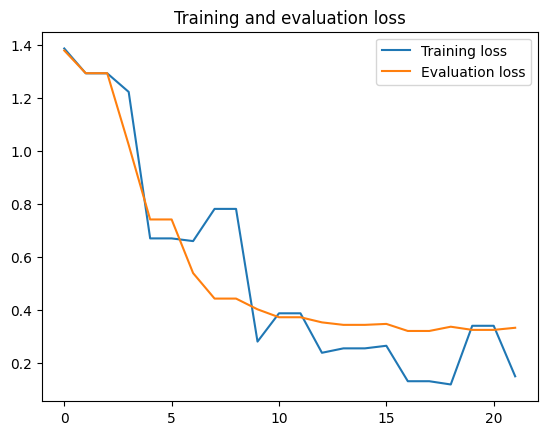

In [ ]:
# Training and evaluation loss
train_loss = history['train_loss']
eval_loss = history['eval_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(eval_loss, label='Evaluation loss')
plt.title('Training and evaluation loss')
plt.legend()

In [ ]:
# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(dev)
result

0it [00:00, ?it/s]

Running Evaluation:   0%|          | 0/3 [00:00<?, ?it/s]

{'mcc': 0.8585979223696178, 'eval_loss': 0.3317519972721736}

Make predictions with the model (predict the labels of the documents in the test set)

In [ ]:
predicted, probabilities = model.predict(test.text.to_list())
test['predicted'] = predicted

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Test set predictions

Evaluate the model's performance on the test set

In [ ]:
# Result (note: your result can be different due to randomness in operations)
print(classification_report(test['labels'], test['predicted']))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       319
           1       0.88      0.90      0.89       389
           2       0.94      0.88      0.91       396
           3       0.81      0.86      0.84       394

    accuracy                           0.87      1498
   macro avg       0.87      0.87      0.87      1498
weighted avg       0.87      0.87      0.87      1498



# RoBERTa

Load the pre-trained model: model_type = roberta; model_name = roberta-base (specifies the exact architecture and trained weights to use)

In [ ]:
model_roberta = ClassificationModel('roberta', 'roberta-base', num_labels=4, args=model_args, use_cuda=True) # CUDA is enabled

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Fine-tuning the model

In [ ]:
_, history_roberta = model_roberta.train_model(train, eval_df=dev)

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 1 of 10:   0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Running Epoch 8 of 10:   0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

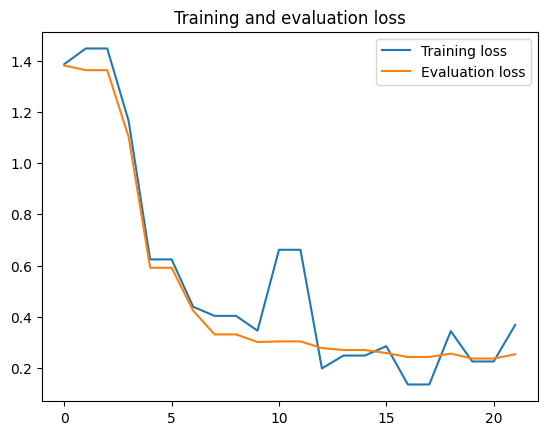

In [ ]:
# Training and evaluation loss
train_loss_roberta = history_roberta ['train_loss']
eval_loss_roberta = history_roberta ['eval_loss']
plt.plot(train_loss_roberta, label='Training loss')
plt.plot(eval_loss_roberta, label='Evaluation loss')
plt.title('Training and evaluation loss')
plt.legend()

The plot shows that, even though the trend for the training loss fluctuates at certain points, both the training loss and the evaluation loss for the RoBERTa Model exhibit an overall decreasing trend. This indicates that the model is learning effectively and generalizing well to new data.

In this case, the training stopped because eval_loss loss did not improve upon the best eval_loss by at least 0.01 for 2 consecutive evaluations. A smoother learning curve can be achieved by varying hyperparameters, e.g., learning rate, batch size.

In [ ]:
# Evaluate RoBERta
result_roberta, model_outputs_roberta, wrong_predictions_roberta = model_roberta.eval_model(dev)
result_roberta

0it [00:00, ?it/s]

Running Evaluation:   0%|          | 0/3 [00:00<?, ?it/s]

{'mcc': 0.8352776391877681, 'eval_loss': 0.25417543699344}

Make predictions with the model (predict the labels of the documents in the test set)

In [ ]:
predicted_roberta, probabilities_roberta = model_roberta.predict(test.text.to_list())
test['predicted_roberta'] = predicted_roberta

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Test set predictions

Evaluate the model's performance on the test set

In [ ]:
# Result (note: your result can be different due to randomness in operations)
print(classification_report(test['labels'], test['predicted_roberta'] ))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       319
           1       0.90      0.89      0.89       389
           2       0.85      0.91      0.88       396
           3       0.83      0.81      0.82       394

    accuracy                           0.85      1498
   macro avg       0.85      0.85      0.85      1498
weighted avg       0.85      0.85      0.85      1498



# Bag-of-Words approach

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords

In [ ]:
full_train = pd.concat([train, dev]) # the initial 'train' set was split into 'train' and 'dev' , here we combine them again including the test set

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
vec = CountVectorizer(min_df=2, # If a token appears fewer times than this, across all documents, it will be ignored
                      tokenizer=nltk.word_tokenize, stop_words=stopwords.words('english'))

In [ ]:
text_train_ = vec.fit_transform(full_train.text)
y_train = full_train.labels

text_test = vec.transform(test.text)
y_test = test.labels

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# train the NB Model
nb_clf = MultinomialNB().fit(text_train_, y_train)

In [ ]:
# Predict and report
nb_predictions = nb_clf.predict(text_test)

# Evaluation
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       319
           1       0.87      0.88      0.88       389
           2       0.85      0.86      0.85       396
           3       0.89      0.78      0.83       394

    accuracy                           0.84      1498
   macro avg       0.84      0.84      0.84      1498
weighted avg       0.85      0.84      0.84      1498



# The Categories:

0 = 'alt.atheism' <br>
1 = 'comp.graphics' <br>
2 = 'sci.med' <br>
3 = 'sci.space'


# Examine the performance of RoBERTa

In [ ]:
print("RoBERTa Classification Report:")
print(classification_report(test['labels'], test['predicted_roberta'] ))

RoBERTa Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       319
           1       0.90      0.89      0.89       389
           2       0.85      0.91      0.88       396
           3       0.83      0.81      0.82       394

    accuracy                           0.85      1498
   macro avg       0.85      0.85      0.85      1498
weighted avg       0.85      0.85      0.85      1498



- The precision scores are high across all categories (>0.80), with the highest (0.90) for 'comp.graphics'(1) and the tied lowest (0.83) for 'alt.atheism'(0) and 'sci.space'(3). This suggests that when the model predicts a category, it is likely correct.

- The recall is also very decent across all categories, with the highest value (0.91) for 'sci.med'(2). The results indicate that the model is good at capturing the majority of actual cases. The slightly lower recall (0.79) for 'alt.atheism'(0) suggests some actual documents might be missed

- The f1-scores are are also high across all categories (>0.80), reflecting a balanced performance between precision and recall. The 'comp.graphics' category (1) has the highest f1-score (0.89), indicating the most effective balance between precision and recall for this category.

- The macro avg and weighted avg for precision, recall, and f1-score are all 0.85, suggesting a consistent and balanced performance across all categories, without any significant bias toward any specific category.

# Compare the performance of RoBERTa to the performance of BERT. Describe the differences in performance in terms of Precision, Recall, and F1-score evaluation metrics.

In [ ]:
print("RoBERTa Classification Report:")
print(classification_report(test['labels'], test['predicted_roberta'] ))
print("BERT Classification Report:")
print(classification_report(test['labels'], test['predicted']))

RoBERTa Classification Report:


NameError: name 'classification_report' is not defined

Having accidentally re-run the cell previously, which could yield different values upon rerunning the notebook, we've opted to present the classification reports of RoBERTa (top) and BERT (bottom) as an image instead.

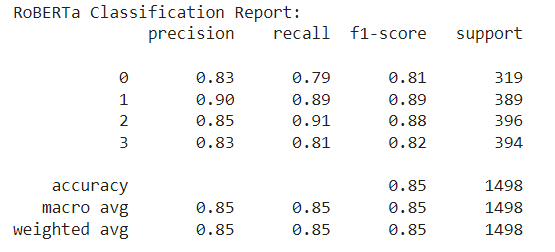
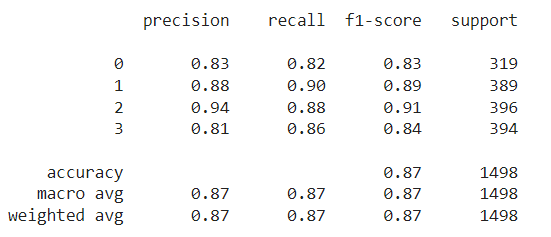

## RoBERTa vs BERT


Bert was trained using a masked language model, which means that certain token inputs were hidden, and a prediction of the hidden tokens was made based on the context provided by the rest of the tokens. Roberta builds upon this methodology but expands it by training on larger batches of text data for more epochs without the next sentence prediction task. It also utilizes dynamic masking, meaning that it randomly hides different parts of text in each training epoch.

This should theoretically lead to a more robust model; however, in our case, RoBERTa's performance is very similar to that of BERT. It's worth noting that both models achieve similar macro average precision, recall, and F1-score, with RoBERTa slightly trailing behind BERT by 0.02 points. Notably, RoBERTa outperforms BERT in precision for categories 'comp.graphics(1) and 'sci.space'(3), scoring 0.90 and 0.83 compared to BERT's 0.88 and 0.81, suggesting better identification of true positives for these categories. Additionally, RoBERTa exhibits superior recall for the category 'sci.med'(2), with a score of 0.91 compared to BERT's 0.88, indicating its proficiency in capturing instances of this class.

Despite the theoretical advantages of RoBERTa's training methodology, our findings suggest that other factors may influence the models' performance comparability, warranting further investigation into dataset characteristics and fine-tuning strategies.


# Compare the performance of RoBERTa to the performance of Naive Bayes. Describe the differences in performance in terms of Precision, Recall, and F1-score evaluation metrics.


In [ ]:
print("RoBERTa Classification Report:")
print(classification_report(test['labels'], test['predicted_roberta'] ))
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))

RoBERTa Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       319
           1       0.90      0.89      0.89       389
           2       0.85      0.91      0.88       396
           3       0.83      0.81      0.82       394

    accuracy                           0.85      1498
   macro avg       0.85      0.85      0.85      1498
weighted avg       0.85      0.85      0.85      1498

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       319
           1       0.87      0.88      0.88       389
           2       0.85      0.86      0.85       396
           3       0.89      0.78      0.83       394

    accuracy                           0.84      1498
   macro avg       0.84      0.84      0.84      1498
weighted avg       0.85      0.84      0.84      1498



**Precision**: RoBERTa outperforms Naive Bayes across all classes on precision apart from 'sci.space' (3). This suggests in these cases RoBERTa was more accurate in identifying the class. The macro average for precision in RoBERTa (0.85) slightly outperformed Naive Bayes (0.84). Suggesting a better performance, however not greatly, in RoBERTa's overall ability to identify the correct class out of all its labels.

**Recall**: RoBERTa outperforms Naive Bayes across all classes on recall apart from 'alt.atheism' (0). This suggests in these cases RoBERTa was better at identifying the true class taking into account real class values it missed. RoBERTa has a slightly higher macro average for recall (0.85) but not much larger than Naive Bayes (0.84). This suggests that there is little difference in both systems ability to find the true class out of all of the true instances of that class.

**F1 score**: RoBERTa and Naive Bayes show similar values for f1 score across the classes. This similarity shows balance between precision and recall displaying accuracy in identifying the correct class out of instances it allocates that class and in accuracy in identifying true class out of all instances with that class.

In summary, RoBERTa exhibits better performance on the test set compared to Naive Bayes, albeit by a small margin. This could likely be attributed to RoBERTa's pattern and context recognition capabilities in text data, while Naive Bayes' strengths are in its efficiency and simplicity.



### End of this notebook.